## Eksplorasi Data

Membaca dataset

In [ ]:
data = '/content/bodyfat.csv'
df = pd.read_csv(data)

Melihat beberapa baris pertama dari dataset


In [ ]:
print("Head:\n{}".format(df.head()))

Melihat ringkasan statistik

In [ ]:
print("\n Describe:\n{}".format(df.describe()))

Head:
   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  

 Describe:
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.0

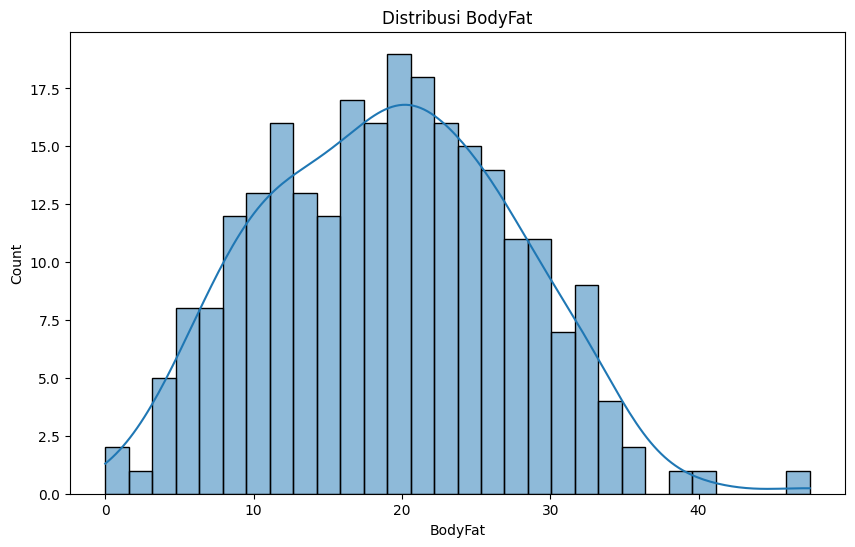


 Korelasi


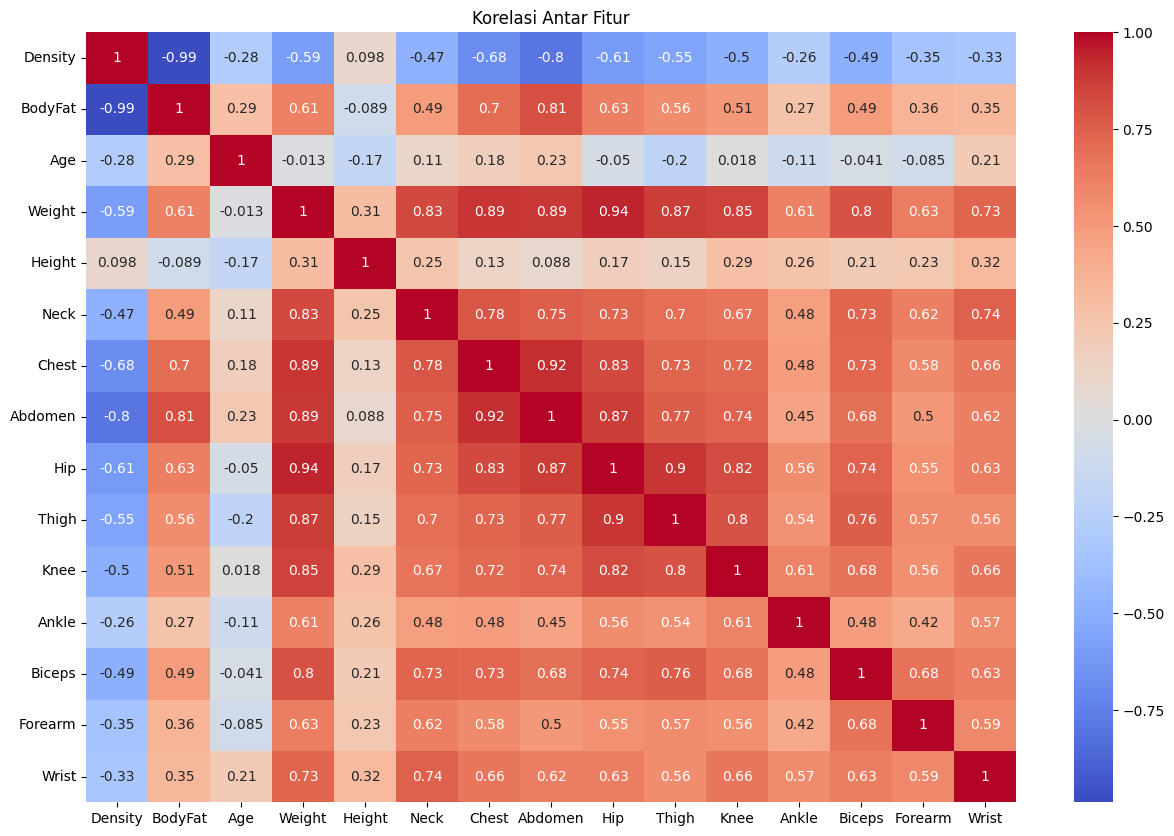

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
data = '/content/bodyfat.csv'
df = pd.read_csv(data)

# Melihat beberapa baris pertama dari dataset
print("Head:\n{}".format(df.head()))

# Melihat ringkasan statistik
print("\n Describe:\n{}".format(df.describe()))

# Melihat informasi dataset
print("\n Info:\n{}".format(df.info()))

# Melihat distribusi BodyFat
print("\n Distribusi")
plt.figure(figsize=(10, 6))
sns.histplot(df['BodyFat'], bins=30, kde=True)
plt.title('Distribusi BodyFat')
plt.show()

# Melihat korelasi antar fitur
print("\n Korelasi")
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()


## Preprocessing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Mengisi nilai yang hilang jika ada
df.fillna(df.mean(), inplace=True)

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']])

data_scaled = pd.DataFrame(data_scaled, columns=['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'])

# Menambahkan fitur baru
df['Height_Weight'] = df['Height'] * df['Weight']
df['Abdomen_Chest'] = df['Abdomen'] * df['Chest']
df['Age_Binned'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
df['Waist_Hip_Ratio'] = df['Abdomen'] / df['Hip']
limb_columns = ['Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
df['Mean_Limb_Size'] = df[limb_columns].mean(axis=1)
df['Max_Limb_Size'] = df[limb_columns].max(axis=1)
df['Log_Weight'] = np.log(df['Weight'] + 1)
df['Log_Height'] = np.log(df['Height'] + 1)

# One-Hot Encoding untuk fitur kategorikal yang baru dibuat
df = pd.get_dummies(df, columns=['Age_Binned'])

# Menampilkan dataset yang telah diproses
print(df.head())


   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   ...  Log_Weight  Log_Height  Age_Binned_0-20  Age_Binned_21-40  \
0  ...    5.045037    4.230477            False              True   
1  ...    5.160491    4.293878            False              True   
2  ...    5.043425    4.208417            False              True   
3  ...    5.224402    4.293878            False              True   
4  ...    5.221706    4.280132            False              True   

   Age_Binned_41-60  Age_Binned_61-80  Age_Binned_0-20  Age_Binned_21-40  \
0             False         

## Pemilihan dan Pelatihan Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Memisahkan fitur dan target
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

# Melatih model Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")

# Melatih model Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

# Mean Squared Error (MSE) adalah salah satu metrik evaluasi yang paling umum digunakan untuk mengukur kinerja model regresi.


Linear Regression MSE: 0.4308081425736504
Decision Tree MSE: 0.6182352941176474
Random Forest MSE: 0.04717564705882357


In [ ]:
# Impor pustaka pickle
import pickle

# Muat objek dari file pickle (jika ada)
try:
    with open('tugas_project.py', 'rb') as f:
        obj = pickle.load(f)
        pickle.dump("tugasproject.py", f)
    print("Object loaded from 'tugasproject.pkl'")
except FileNotFoundError:
    print("File 'tugasproject.pkl' not found. No object loaded.")
except Exception as e:
    print(f"Error loading object: {e}")

# Jika Anda ingin menyimpan model yang telah dilatih, lakukan seperti ini:
# with open('tugasproject.pkl', 'wb') as f:
#     pickle.dump(model_yang_ingin_disimpan, f)

File 'tugasproject.pkl' not found. No object loaded.
